Import Statements

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

Function and Class Definitions

In [44]:
class ImageWindow(tk.Tk):
    
    '''
    Input window, takes in image in a GUI fashion
    Side Effects:       Inputs an Image path
                        Creates a window on output
    '''

    def __init__(self):
        
        '''
        Sets up the window properties
        '''

        super().__init__()
        self.title("Image Viewer")
        self.geometry("700x700")
        
        # Create a label to display the image
        self.image_label = tk.Label(self)
        self.image_label.pack(padx=10, pady=50)
        
        # Register the drag and drop event handlers
        self.bind("<Button-1>", self.on_drop)

    def on_drop(self, event):
        
        '''
        A file explorer window opens to select the path of the image you want.
        '''

        # Prompt the user to select an image file
        global file_path

        file_path = filedialog.askopenfilename(
            title="Select Image",
            filetypes=(("Image files", "*.png;*.jpg;*.jpeg;*.gif;*.webp;*.HEIF"), ("All files", "*.*"))
        )
        
        if file_path:
            ## Destroy the window and return the file path.
            self.destroy()
            return file_path

In [45]:
def convolution_action(image):

    '''
    Acting on the image, does a box blur, and then saved and shows the image on the screen.
    Side Effects:   Outputs matplotlib graph. 
                    Takes intensity input from user.
                    May change image.
    '''

    intensity = int(input("Intensity of Blurring: "))

    ## Kernel for box blur filter
    ## It is a unity matrix which is divided by 9 
    box_blur_ker = 1/intensity**2 * np.ones((intensity,intensity))

    ## Applying Box Blur
    ## Ddepth is destination depth. -1 will mean output image will have same depth as input image
    ## Kernel is used for specifying the kernel operation (here, box_blur_ker)
    Box_blur = cv2.filter2D(src=image, ddepth=-1, kernel=box_blur_ker)

    ## Saving the image as sampleoutput.png using plt.imsave.
    plt.imsave("sampleoutput.png", Box_blur)

    ## Showing the image using matplotlib.pyplot
    plt.imshow(Box_blur)
    plt.title("Output Image")
    plt.xlabel(f"Blur of intensity: {intensity}")
    plt.show()

In [46]:
def start_action(input_img):

    '''
    Getting the input image that will be used in the program.
    Side Effects: Initiates img variable, which is used in the rest of the code
    '''

    ## We read the original image using cv2.imread() function, and then convert the image 
    ## into numpy layers that would be easier doing convolution with. 
    img = np.asarray(cv2.imread(input_img))

    ## Showing the numpy array as an image using matplotlib.pyplot
    plt.imshow(img)
    plt.title("Input Image")
    plt.show()

    convolution_action(img)

In [47]:
def input_window():
    # Create an instance of the ImageWindow class
    window = ImageWindow()
    window.mainloop()

    start_action(file_path)

Main Function

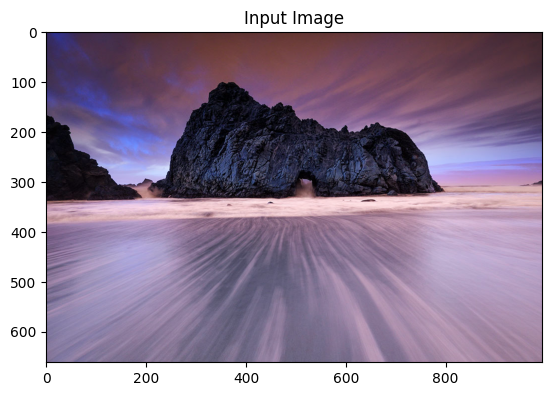

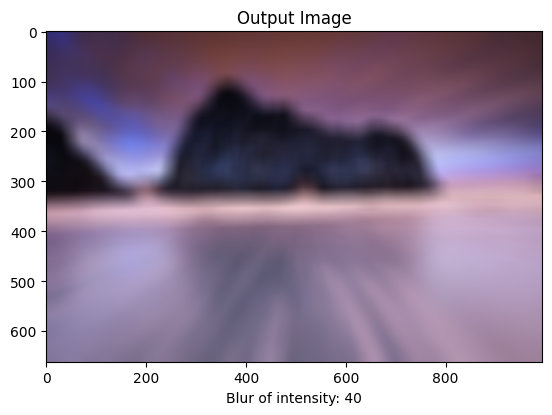

In [48]:
if __name__ == "__main__":
    input_window()